In [ ]:
# @title
### EP2 MAC0417 / MAC5768
##################################################################
# AO PREENCHER ESSE CABEÇALHO COM O MEU NOME E O MEU NÚMERO USP,#
# DECLARO QUE SOU O ÚNICO AUTOR E RESPONSÁVEL PELA RESOLUÇÃO #
# DESTE EP. #
# TODAS AS PARTES FORAM DESENVOLVIDAS E IMPLEMENTADAS POR MIM, #
# SEGUINDO AS INSTRUÇÕES E QUE PORTANTO, NÃO CONSTITUEM #
# DESONESTIDADE ACADÊMICA OU PLÁGIO. #
# #
# DECLARO TAMBÉM, QUE SOU RESPONSÁVEL POR TODAS AS CÓPIAS #
# DESSE PROGRAMA, E QUE EU NÃO DISTRIBUI OU FACILITEI A #
# SUA DISTRIBUIÇÃO. ESTOU CIENTE QUE OS CASOS DE PLÁGIO E #
# DESONESTIDADE ACADÊMICA SERÃO TRATADOS SEGUNDO OS CRITÉRIOS #
# DEFINIDOS NO CÓDIGO DE ÉTICA DA USP. #
# #
# ENTENDO QUE JUPYTER NOTEBOOKS SEM ASSINATURA NÃO SERÃO #
# CORRIGIDOS E, AINDA ASSIM, PODERÃO SER PUNIDOS POR #
# DESONESTIDADE ACADÊMICA. #
# #
# #
# Nome : Sabrina Araújo da Silva #
# NUSP : 12566182 #
# Turma: MAC0417 #
# Prof.: Ronaldo Fumio Hashimoto #
##################################################################

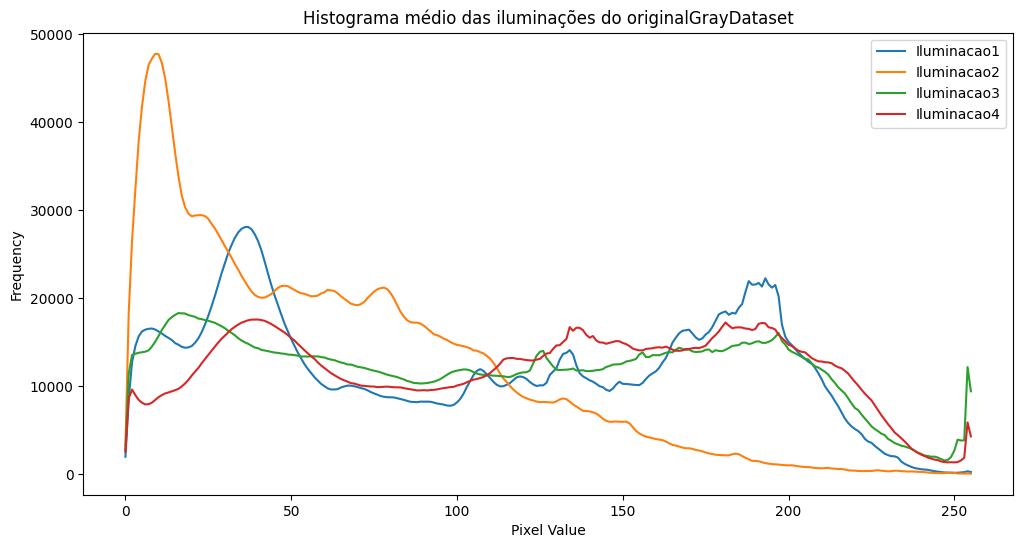

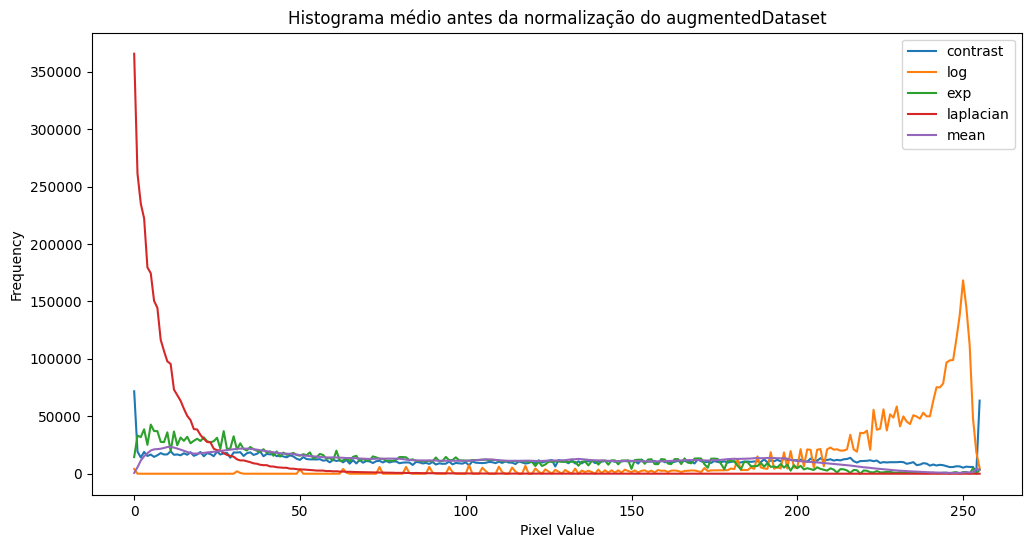

C:\Users\Sabrina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Sabrina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


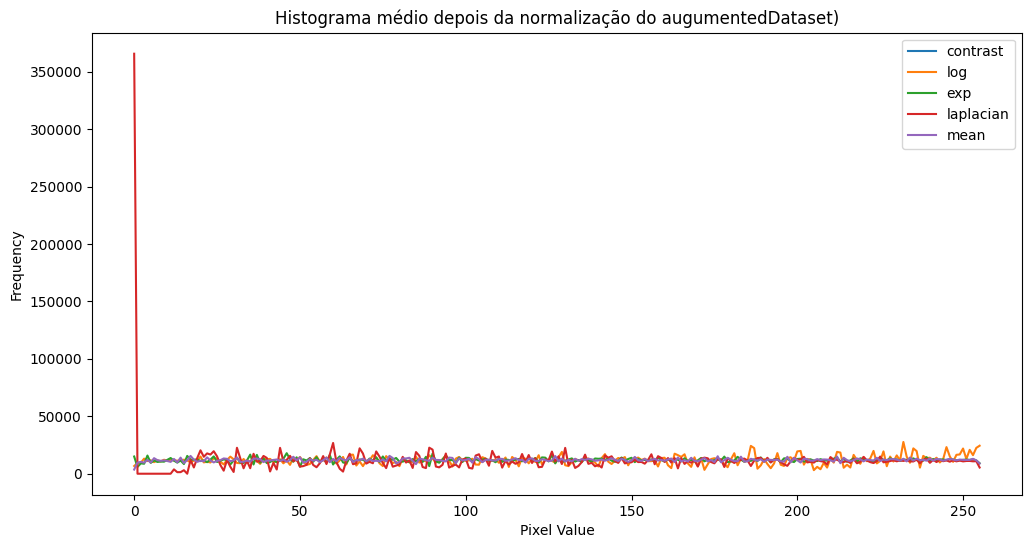

<Figure size 2000x1000 with 0 Axes>

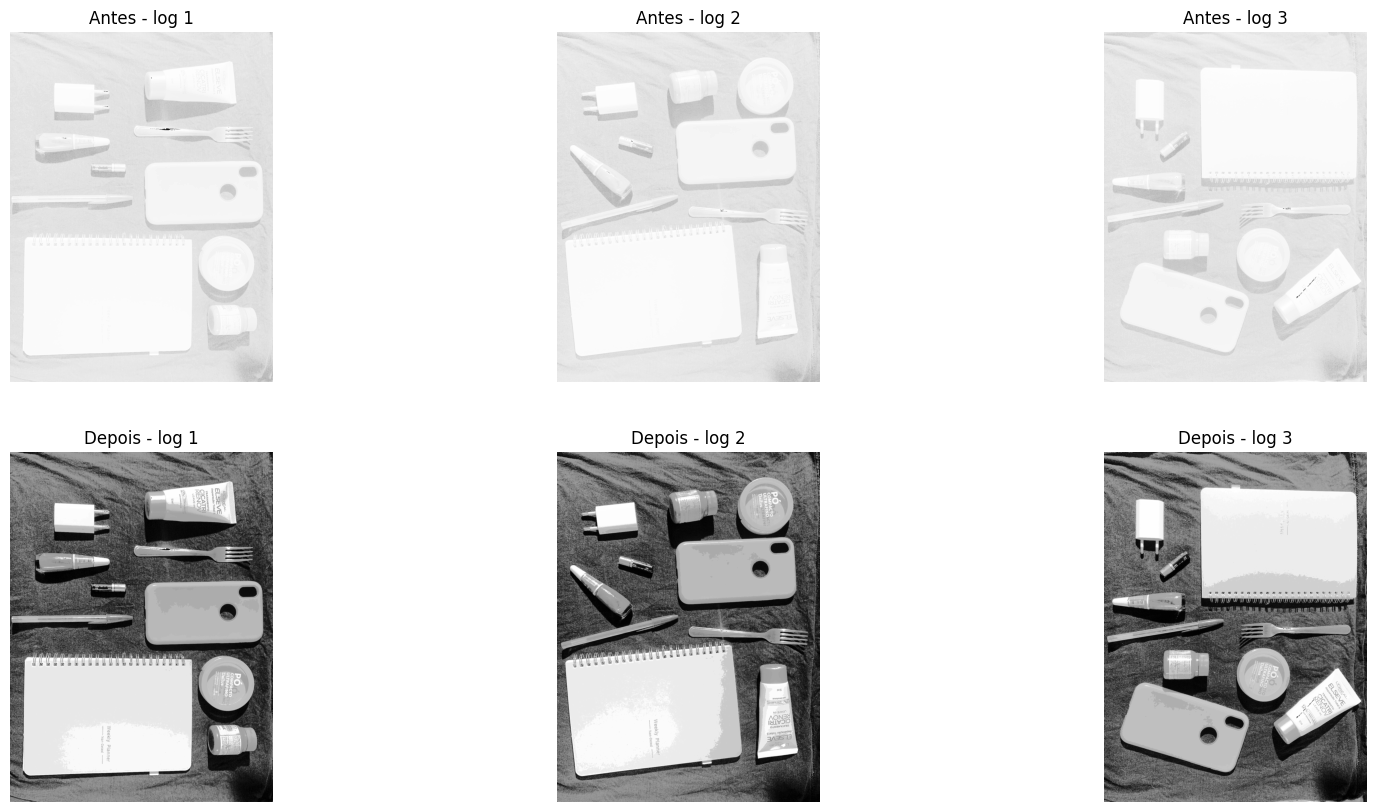

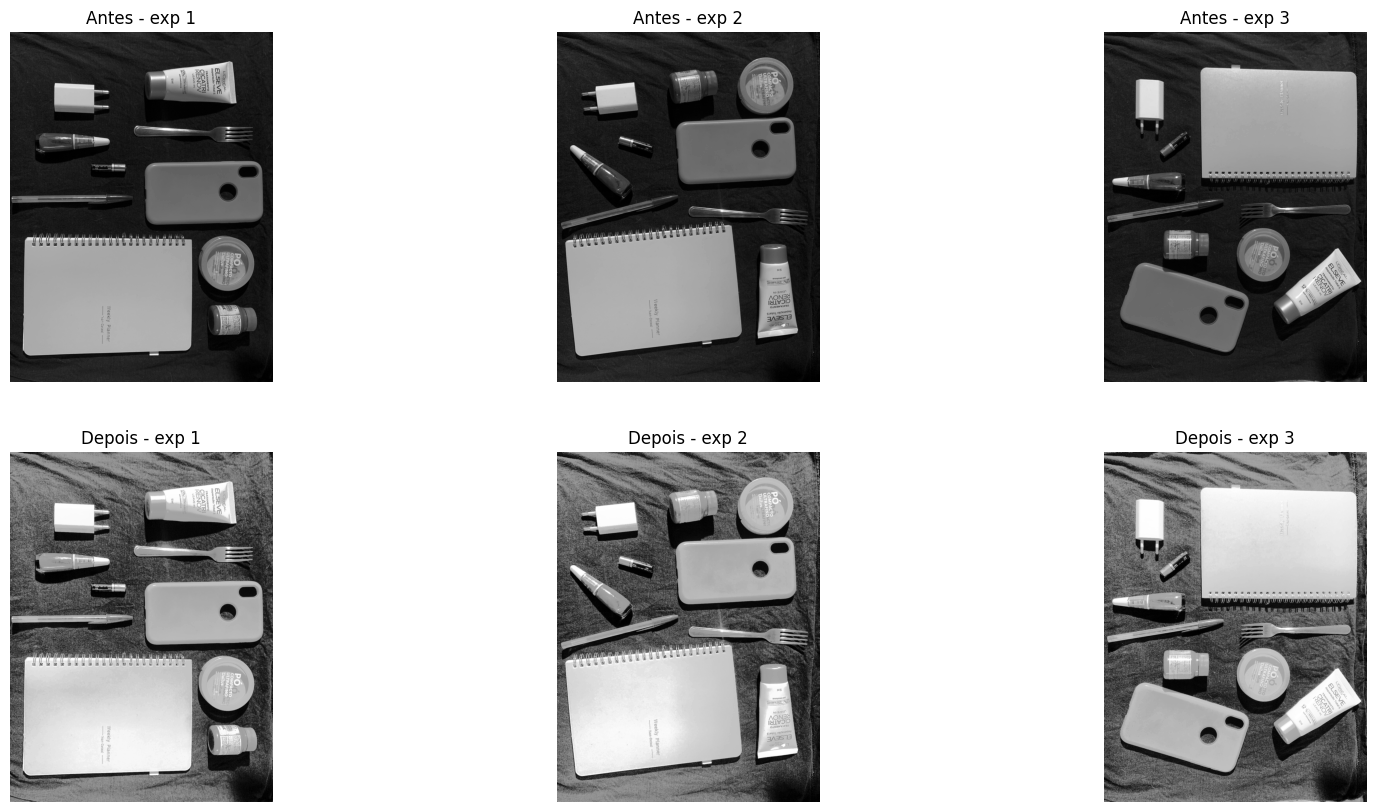

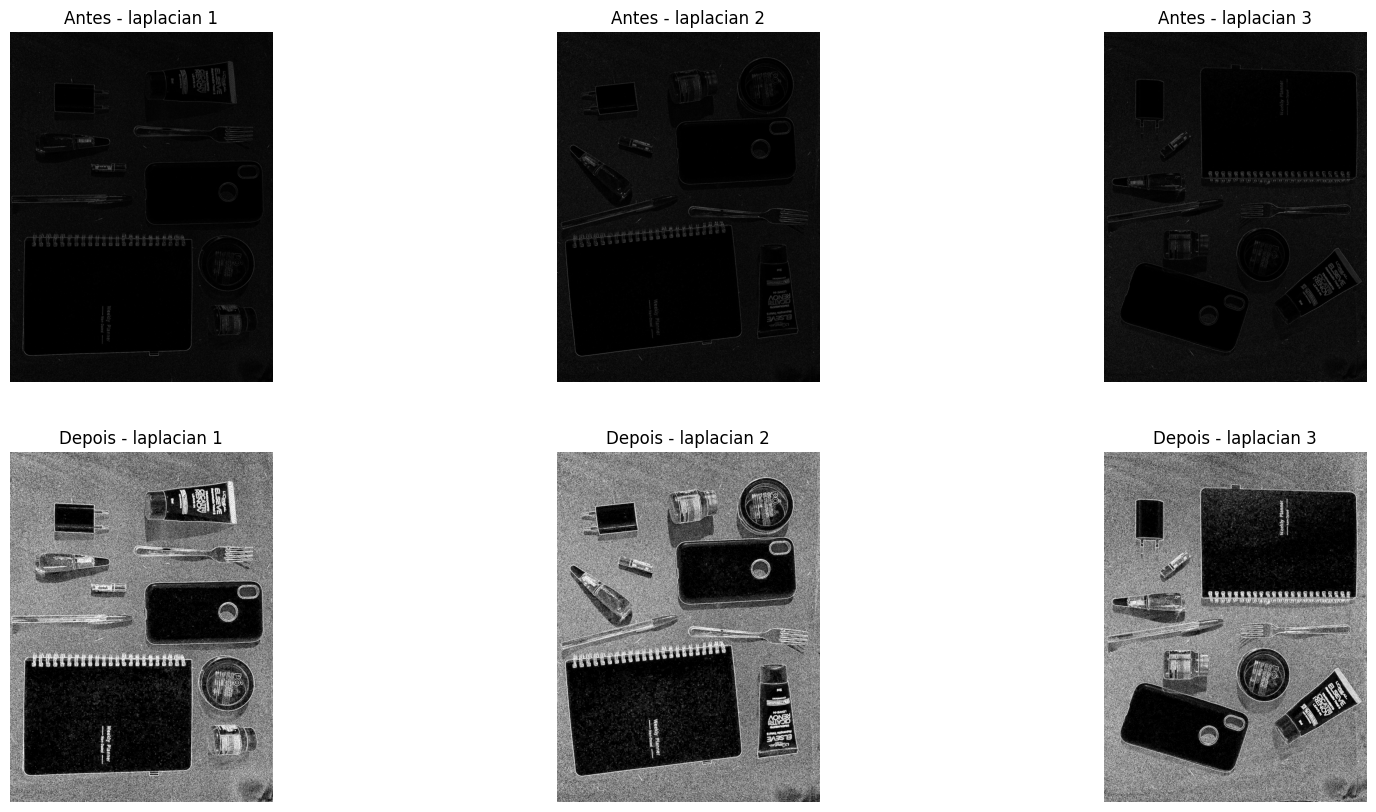

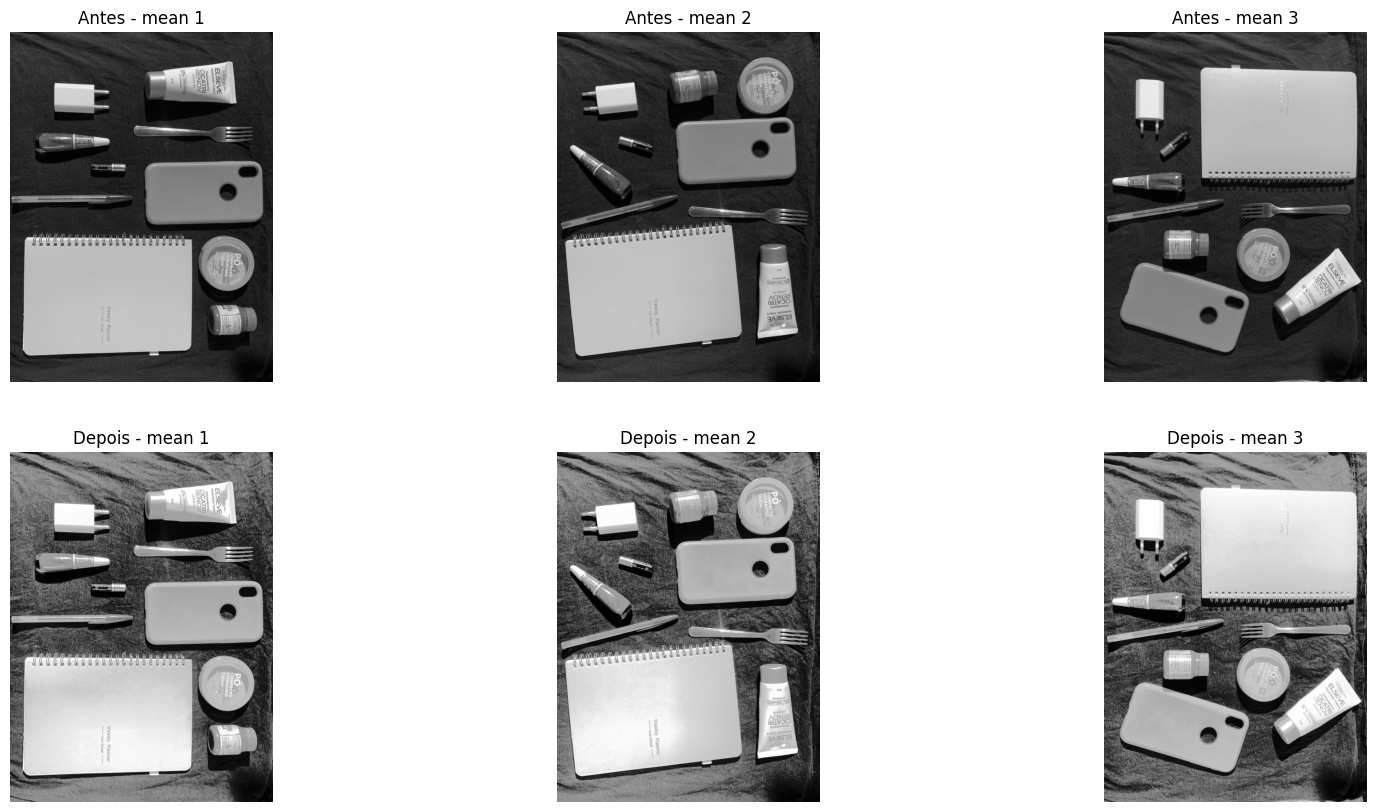

In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Carrega as imagens de um diretório
def load_images_from_folder(folder, filenames):
    images = []
    for filename in filenames:
        img = cv2.imread(os.path.join(folder, f"{filename}.png"), cv2.IMREAD_GRAYSCALE)
        if img is not None:
            images.append((img, filename))
    return images

# Aplica a equalização de histograma em uma imagem
def equalize_histogram(image):
    if len(image.shape) == 2:  # Imagem em escala de cinza
        return cv2.equalizeHist(image)
    elif len(image.shape) == 3:  # Imagem colorida
        img_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
        img_yuv[:, :, 0] = cv2.equalizeHist(img_yuv[:, :, 0])
        return cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

# Normaliza as imagens de um diretório e salvar em outro diretório
def normalize_dataset(input_folder, output_folder, filenames):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    images = load_images_from_folder(input_folder, filenames)
    for img, filename in images:
        normalized_img = equalize_histogram(img)
        cv2.imwrite(os.path.join(output_folder, f"{filename}.png"), normalized_img)

# Calcula o histograma médio
def calculate_mean_histogram(images):
    histograms = [cv2.calcHist([img], [0], None, [256], [0, 256]) for img, _ in images]
    mean_histogram = np.mean(histograms, axis=0)
    return mean_histogram

# Visualiza os histogramas
def plot_histograms(histograms, title):
    plt.figure(figsize=(12, 6))
    for key, hist in histograms.items():
        plt.plot(hist, label=key)
    plt.title(title)
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Carrega metadados
metadados = pd.read_csv('metadados.csv', sep=';')
illuminations = metadados['Iluminacao'].unique()

# originalGrayDataset
gray_images_by_illumination = {
    illum: load_images_from_folder(
        'originalGrayDataset', 
        [f"{name}_gray" for name in metadados[metadados['Iluminacao'] == illum]['Nome da imagem']]
    )
    for illum in illuminations
}

mean_histograms_gray = {
    illum: calculate_mean_histogram(images)
    for illum, images in gray_images_by_illumination.items()
}
plot_histograms(mean_histograms_gray, 'Histograma médio das iluminações do originalGrayDataset')

# augmentedDataset
augmented_directories = {
    'contrast': 'augmentedDataset/contrast_stretching',
    'log': 'augmentedDataset/log',
    'exp': 'augmentedDataset/exp',
    'laplacian': 'augmentedDataset/laplacian',
    'mean': 'augmentedDataset/mean'
}

augmented_images = {
    key: load_images_from_folder(
        directory, 
        [f"{name}_{key}" for name in metadados['Nome da imagem']]
    )
    for key, directory in augmented_directories.items()
}

mean_histograms_augmented = {
    key: calculate_mean_histogram(images)
    for key, images in augmented_images.items()
}
plot_histograms(mean_histograms_augmented, 'Histograma médio antes da normalização do augmentedDataset')

# Normaliza as imagens de augmentedDataset
input_base_folder = 'augmentedDataset'
output_base_folder = 'normalizedDataset'
subdirs = ['contrast_stretching', 'log', 'exp', 'laplacian', 'mean']

for subdir in subdirs:
    input_folder = os.path.join(input_base_folder, subdir)
    output_folder = os.path.join(output_base_folder, subdir)
    filenames = [f"{name}_{subdir}" for name in metadados['Nome da imagem']]
    normalize_dataset(input_folder, output_folder, filenames)

# normalizedDataset
normalized_directories = {
    'contrast': 'normalizedDataset/contrast_stretching',
    'log': 'normalizedDataset/log',
    'exp': 'normalizedDataset/exp',
    'laplacian': 'normalizedDataset/laplacian',
    'mean': 'normalizedDataset/mean'
}

normalized_images = {
    key: load_images_from_folder(
        directory, 
        [f"{name}_{key}" for name in metadados['Nome da imagem']]
    )
    for key, directory in normalized_directories.items()
}

mean_histograms_normalized = {
    key: calculate_mean_histogram(images)
    for key, images in normalized_images.items()
}
plot_histograms(mean_histograms_normalized, 'Histograma médio depois da normalização do augumentedDataset)')

# Mostra imagens antes e depois da normalização
def show_images_before_after(images_before, images_after, titles):
    plt.figure(figsize=(20, 10))
    for i, ((img_before, _), (img_after, _), title) in enumerate(zip(images_before, images_after, titles)):
        plt.subplot(2, len(images_before), i + 1)
        plt.imshow(img_before, cmap='gray')
        plt.title(f'Antes - {title}')
        plt.axis('off')
        
        plt.subplot(2, len(images_after), i + 1 + len(images_before))
        plt.imshow(img_after, cmap='gray')
        plt.title(f'Depois - {title}')
        plt.axis('off')
    plt.show()

for key, directory in augmented_directories.items():
    images_before = load_images_from_folder(directory, [f"{name}_{key}" for name in metadados['Nome da imagem'][:3]])
    images_after = load_images_from_folder(normalized_directories[key], [f"{name}_{key}" for name in metadados['Nome da imagem'][:3]])
    show_images_before_after(images_before, images_after, [f"{key} {i+1}" for i in range(3)])


O uso da equalização de histograma para normalizar as imagens resultou em uma distribuição de  intensidade mais uniforme e aumentou o contraste das imagens, e assim detalhes das imagens  foram destacados. 

No histograma médio do gray dataset, é possível observar que a iluminação 2  (fora de casa à noite) teve maiores intensidades escuras. 

Antes da normalização, 'log' e 'laplacian' apresentaram picos de intensidades que foram suavizados após a normalização. 

Entretanto, mesmo após a normalização, o gráfico do 'laplacian' ainda apresentou um pico de valores de intensidade escuros. O filtro Laplaciano destaca as bordas das imagens, e as áreas uniformes ficam com valores de intensidade próximos a 0. E após a normalização, muitos desses valores ainda permanecem próximos a 0.

No geral, a normalização melhorou a nitidez e a definição dos objetos, principalmente nas imagens em que originalmente eram muito claras ou muito escuras.
